In [88]:
import os,sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
os.chdir('/data/arpit.goel/32_RecruitRestarauntPrediction/')

df_air_reserve=pd.read_csv('01.RawData/air_reserve.csv',parse_dates=['visit_datetime','reserve_datetime'])
df_air_store_info=pd.read_csv('01.RawData/air_store_info.csv')
df_air_visit_data=pd.read_csv('01.RawData/air_visit_data.csv',parse_dates=['visit_date'])
df_date_info=pd.read_csv('01.RawData/date_info.csv',parse_dates=['calendar_date'])
df_hpg_reserve=pd.read_csv('01.RawData/hpg_reserve.csv',parse_dates=['visit_datetime','reserve_datetime'])
df_hpg_store_info=pd.read_csv('01.RawData/hpg_store_info.csv')
df_store_id_relation=pd.read_csv('01.RawData/store_id_relation.csv')
df_sample_submission=pd.read_csv('01.RawData/sample_submission.csv')
df_store_master=pd.read_csv('02.CleanData/01.StoreRegion.csv')

In [310]:
df_air_visit_data.dtypes

air_store_id            object
visit_date      datetime64[ns]
visitors                 int64
log_visitors           float64
dtype: object

In [211]:
df_air_visit_data.loc[:,'log_visitors']=np.log(1+df_air_visit_data.loc[:,'visitors'])
daily_visits=df_air_visit_data.groupby(['air_store_id','visit_date'])['log_visitors'].max().unstack()
daily_visits.head()

visit_date,2016-01-01 00:00:00,2016-01-02 00:00:00,2016-01-03 00:00:00,2016-01-04 00:00:00,2016-01-05 00:00:00,2016-01-06 00:00:00,2016-01-07 00:00:00,2016-01-08 00:00:00,2016-01-09 00:00:00,2016-01-10 00:00:00,...,2017-04-13 00:00:00,2017-04-14 00:00:00,2017-04-15 00:00:00,2017-04-16 00:00:00,2017-04-17 00:00:00,2017-04-18 00:00:00,2017-04-19 00:00:00,2017-04-20 00:00:00,2017-04-21 00:00:00,2017-04-22 00:00:00
air_store_id,,,,,,,,,,,,,,,,,,,,,
air_00a91d42b08b08d9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.555348,3.688879,NaN,NaN,2.995732,3.583519,2.890372,3.663562,4.025352,2.944439
air_0164b9927d20bcc3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.639057,2.079442,0.693147,NaN,1.098612,0.693147,2.197225,0.693147,3.295837,1.945910
air_0241aa3964b7f861,NaN,NaN,2.397895,2.302585,2.890372,2.397895,NaN,1.791759,2.197225,2.833213,...,NaN,1.609438,2.772589,2.397895,2.564949,2.995732,2.197225,NaN,1.386294,2.639057
air_0328696196e46f18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,2.302585,1.609438,1.386294,1.386294,NaN,3.218876,NaN,2.995732,2.197225
air_034a3d5b40d5b1b1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.135494,2.944439,3.465736,3.688879,3.258097,3.044522,3.465736,2.564949,3.637586,3.583519


In [2]:
df_air_reserve.head()

,air_store_id,visit_datetime,reserve_datetime,reserve_visitors
0,air_877f79706adbfb06,2016-01-01 19:00:00,2016-01-01 16:00:00,1
1,air_db4b38ebe7a7ceff,2016-01-01 19:00:00,2016-01-01 19:00:00,3
2,air_db4b38ebe7a7ceff,2016-01-01 19:00:00,2016-01-01 19:00:00,6
3,air_877f79706adbfb06,2016-01-01 20:00:00,2016-01-01 16:00:00,2
4,air_db80363d35f10926,2016-01-01 20:00:00,2016-01-01 01:00:00,5


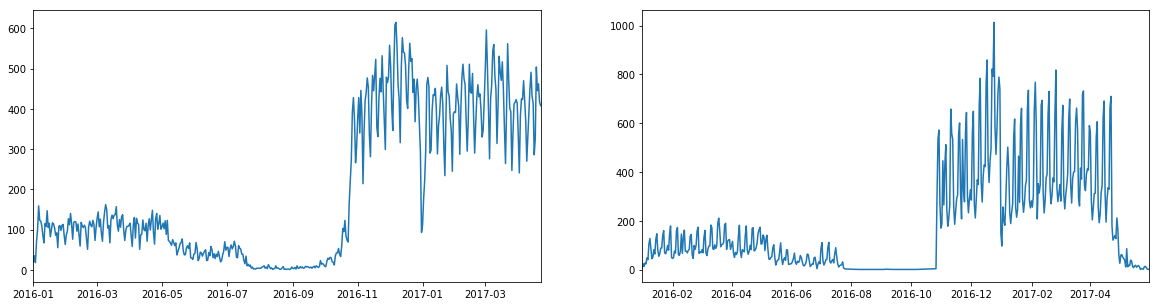

In [16]:
plt.figure(figsize=(20,5))
plt.subplot(121)
df_air_reserve['reserve_datetime'].dt.date.value_counts().plot()
plt.subplot(122)
df_air_reserve['visit_datetime'].dt.date.value_counts().plot()

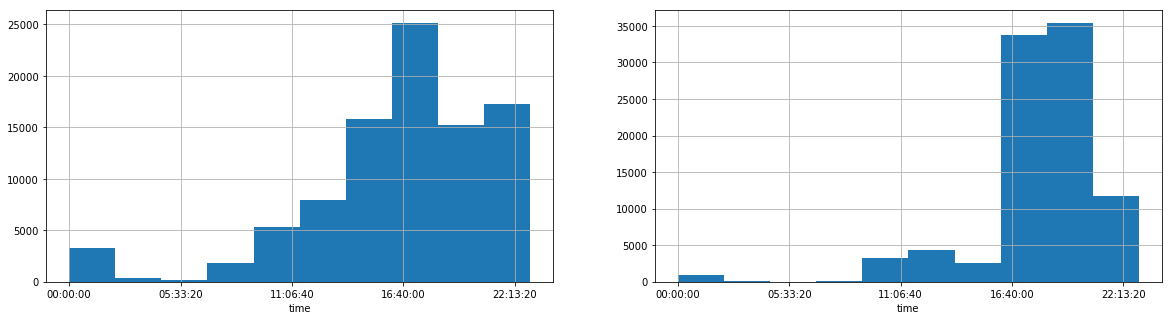

In [20]:
plt.figure(figsize=(20,5))
plt.subplot(121)
df_air_reserve['reserve_datetime'].dt.time.hist()
plt.subplot(122)
df_air_reserve['visit_datetime'].dt.time.hist()

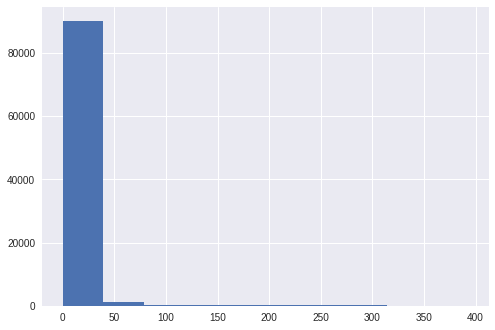

In [103]:
df_air_reserve['days_prior']=(df_air_reserve['visit_datetime'].dt.date-df_air_reserve['reserve_datetime'].dt.date).dt.days
df_air_reserve['days_prior'].hist()
#Most of the reservations are less than 1 day in advance. Need to remove these for analysis

/data/arpit.goel/anaconda/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


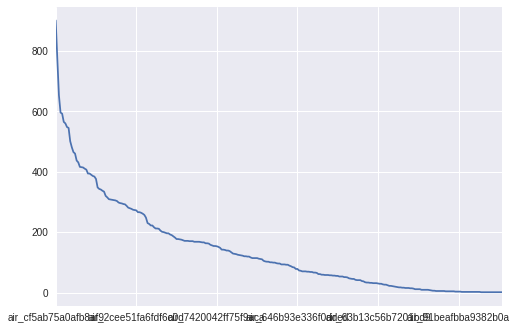

In [107]:
#Most of the reservations are less than 1 day in advance. Need to remove these for analysis
from datetime import datetime
prior_reservations=df_air_reserve[(df_air_reserve['days_prior']>1)&(df_air_reserve['reserve_datetime']>=datetime(2016,11,1))]
prior_reservations['days_prior']=prior_reservations[prior_reservations['days_prior']<39]
prior_reservations['days_prior'].value_counts().plot()

(280,)


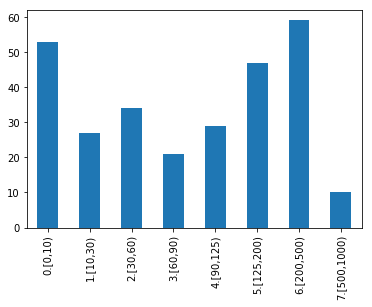

In [67]:
bins=[0,10,30,60,90,125,200,500,1000]
labels=['%d.[%d,%d)'%(i,x,y) for i,(x,y) in enumerate(zip(bins[:-1],bins[1:]))]
print (prior_reservations['air_store_id'].value_counts().shape)
pd.cut(prior_reservations['air_store_id'].value_counts(),bins=bins,labels=labels).value_counts().sort_index().plot(kind='bar')

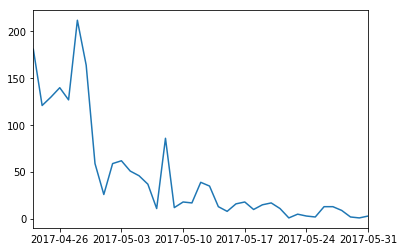

In [75]:
test_reservations=df_air_reserve[df_air_reserve['visit_datetime']>=datetime(2017,4,23)]
test_reservations['visit_datetime'].dt.date.value_counts().sort_index().plot()

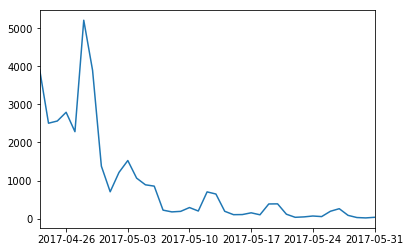

In [76]:
test_reservations=df_hpg_reserve[df_hpg_reserve['visit_datetime']>=datetime(2017,4,23)]
test_reservations['visit_datetime'].dt.date.value_counts().sort_index().plot()

These datasets combined may be used to predict at region level instead of store level

0.846486437012
0.87707784685
0.662461941895
0.8208680819
0.760950389154
0.729212613986
0.818738619043
0.705048468825
0.795207992905
0.760725131816
0.751050052784


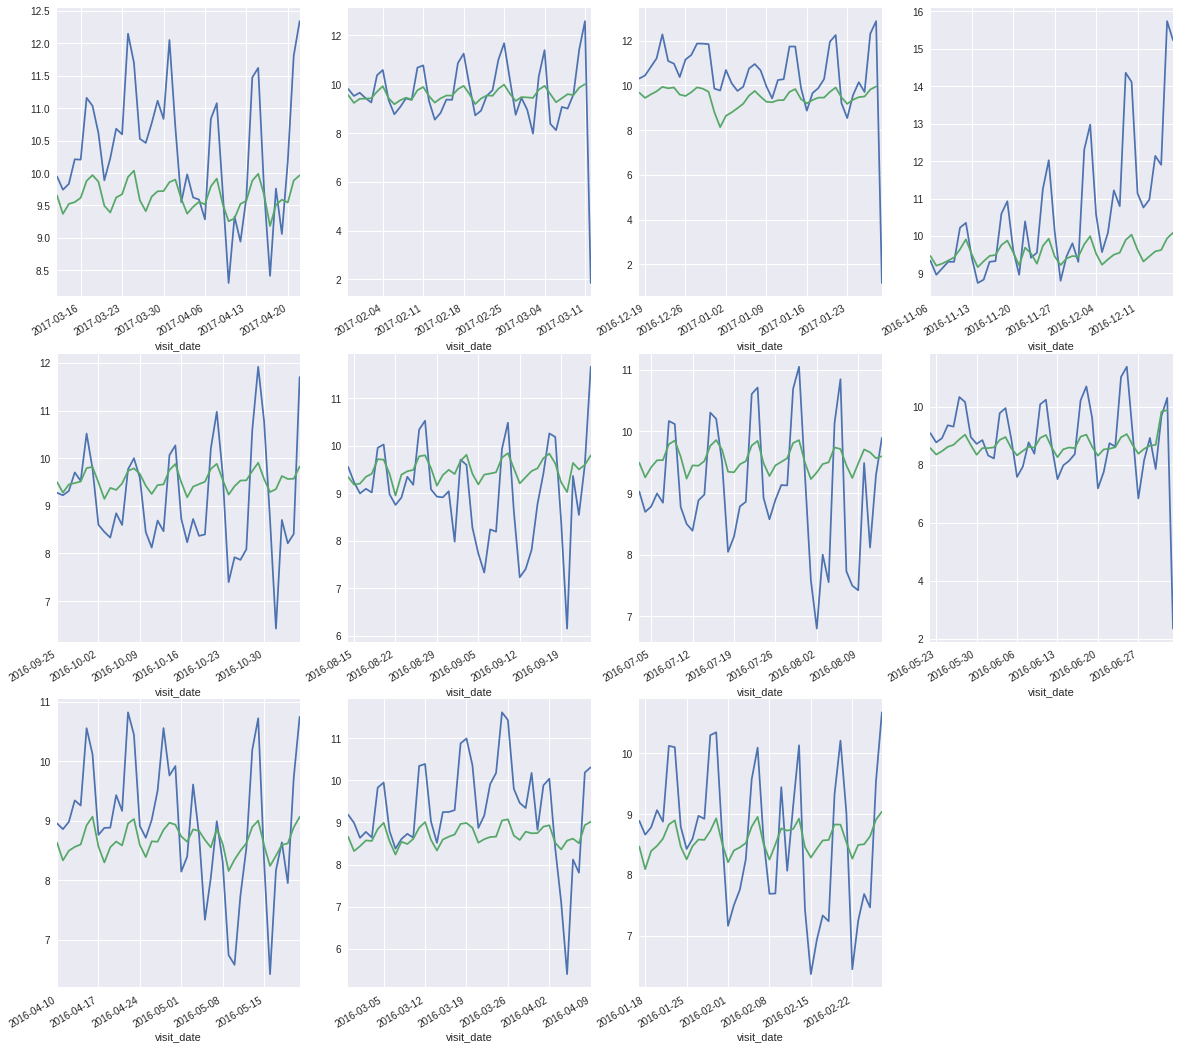

In [227]:
from datetime import timedelta

all_reservations=pd.concat([df_hpg_reserve,df_air_reserve])
all_reservations['flag_air']=np.where(all_reservations['air_store_id'].notnull(),1,0)
all_reservations['store_id']=np.where(all_reservations['flag_air'],all_reservations['air_store_id'],all_reservations['hpg_store_id'])

plt.figure(figsize=(20,20))
for i,window in enumerate(range(42,470,42)):
#for window in [42]:
    plt.subplot(3,4,i+1)
    all_reservations=pd.concat([df_hpg_reserve,df_air_reserve])
    all_reservations['flag_air']=np.where(all_reservations['air_store_id'].notnull(),1,0)
    all_reservations['store_id']=np.where(all_reservations['flag_air'],all_reservations['air_store_id'],all_reservations['hpg_store_id'])
    all_reservations=all_reservations[all_reservations['reserve_datetime']< datetime(2017,4,23)-timedelta(days=window)]
    all_reservations=all_reservations[all_reservations['reserve_datetime']>=datetime(2017,4,23)-timedelta(days=window+42)]
    all_reservations=all_reservations[all_reservations['visit_datetime']>= datetime(2017,4,23)-timedelta(days=window)]
    all_reservations=all_reservations[all_reservations['visit_datetime']<= datetime(2017,4,23)-timedelta(days=window-42)]
    all_reservations['visit_date']=all_reservations['visit_datetime'].dt.date
    all_reservations=np.log(1+all_reservations.groupby(['visit_date'])['reserve_visitors'].sum())
    all_reservations=np.exp(0.0125*np.arange(len(all_reservations)))*all_reservations
    all_reservations.plot()
    daily_reserve=df_air_visit_data[df_air_visit_data['visit_date']>= datetime(2017,4,23)-timedelta(days=window)]
    daily_reserve=daily_reserve[daily_reserve['visit_date']<  datetime(2017,4,23)-timedelta(days=window-42)]
    daily_reserve=np.log(1+daily_reserve.groupby(['visit_date'])['visitors'].sum())
    daily_reserve.plot()
    print (pd.concat([all_reservations,daily_reserve],axis=1).corr().ix[0,1])


In [167]:
from datetime import timedelta


plt.figure(figsize=(20,20))
#for i,window in enumerate(range(42,470,42)):
for window in [42]:
    all_reservations=pd.concat([df_hpg_reserve,df_air_reserve])
    all_reservations['flag_air']=np.where(all_reservations['air_store_id'].notnull(),1,0)
    all_reservations['store_id']=np.where(all_reservations['flag_air'],all_reservations['air_store_id'],all_reservations['hpg_store_id'])
    all_reservations=pd.concat([df_hpg_reserve,df_air_reserve])
    all_reservations['flag_air']=np.where(all_reservations['air_store_id'].notnull(),1,0)
    all_reservations['store_id']=np.where(all_reservations['flag_air'],all_reservations['air_store_id'],all_reservations['hpg_store_id'])
    all_reservations=all_reservations[all_reservations['reserve_datetime']< datetime(2017,4,23)-timedelta(days=window)]
    all_reservations=all_reservations[all_reservations['reserve_datetime']>=datetime(2017,4,23)-timedelta(days=window+42)]
    all_reservations=all_reservations[all_reservations['visit_datetime']>= datetime(2017,4,23)-timedelta(days=window)]
    all_reservations=all_reservations[all_reservations['visit_datetime']<= datetime(2017,4,23)-timedelta(days=window-42)]
    all_reservations['visit_date']=all_reservations['visit_datetime'].dt.date
    all_reservations=np.log(1+all_reservations.groupby(['visit_date'])['reserve_visitors'].sum())
    daily_reserve=df_air_visit_data[df_air_visit_data['visit_date']>= datetime(2017,4,23)-timedelta(days=window)]
    daily_reserve=daily_reserve[daily_reserve['visit_date']<  datetime(2017,4,23)-timedelta(days=window-42)]
    daily_reserve=np.log(1+daily_reserve.groupby(['visit_date'])['visitors'].sum())
    df_1=pd.concat([all_reservations,daily_reserve],axis=1)
    df_1.loc[1:,'delta_reserve']=np.diff(df_1['reserve_visitors'],1)
    df_1.loc[1:,'delta_visitors']=np.diff(df_1['visitors'],1)
    print (df_1[['delta_reserve','delta_visitors','visitors','reserve_visitors']].dropna().corr())


                  delta_reserve  delta_visitors  visitors  reserve_visitors
delta_reserve          1.000000        0.743845  0.285013          0.190918
delta_visitors         0.743845        1.000000  0.537153          0.191696
visitors               0.285013        0.537153  1.000000          0.434656
reserve_visitors       0.190918        0.191696  0.434656          1.000000


,visitors,reserve_visitors,new_reservations
visitors,1.000000,0.427808,0.846486
reserve_visitors,0.427808,1.000000,0.562142
new_reservations,0.846486,0.562142,1.000000


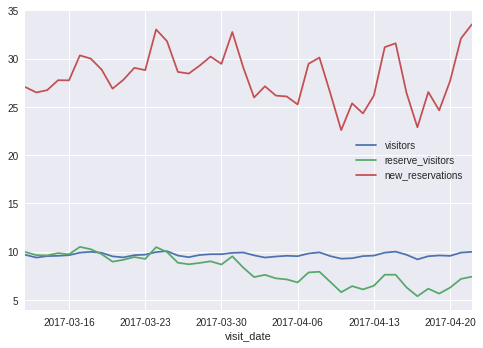

In [191]:
df_1['new_reservations']=np.exp(0.0125*np.arange(len(df_1))+1)*df_1['reserve_visitors']

df_1[['visitors','reserve_visitors','new_reservations']].plot()
df_1[['visitors','reserve_visitors','new_reservations']].corr()

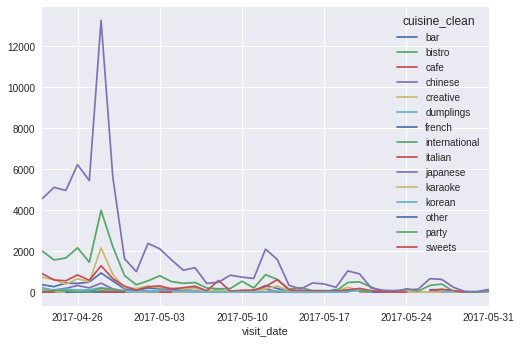

In [101]:
all_reservations=pd.concat([df_hpg_reserve,df_air_reserve])
all_reservations['flag_air']=np.where(all_reservations['air_store_id'].notnull(),1,0)
all_reservations['store_id']=np.where(all_reservations['flag_air'],all_reservations['air_store_id'],all_reservations['hpg_store_id'])
all_reservations=all_reservations[all_reservations['visit_datetime']>= datetime(2017,4,23)]
all_reservations=pd.merge(all_reservations,df_store_master,on='store_id',how='left')
all_reservations['visit_date']=all_reservations['visit_datetime'].dt.date
all_reservations.groupby(['visit_date','cuisine_clean'])['reserve_visitors'].sum().unstack().plot()



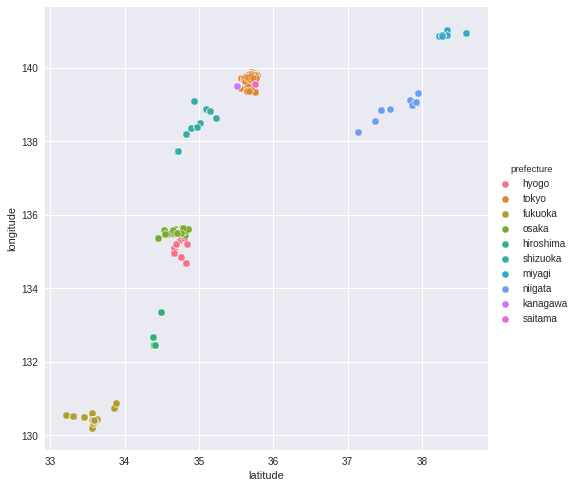

In [94]:
import seaborn as sns
sns.pairplot(x_vars=['latitude'], y_vars=['longitude'], data=df_store_master, hue='prefecture', size=7)

In [ ]:
TEST_PERIOD=42 #Period is 39 days but take 42 days to make sure that that weekly patterns are captured
TRAINING_WINDOW_WEEK=84 #Take 84 days as training window and get median weekday visits as benchmark
TRAINING_WINDOW_OVERALL=70 

predictions_1=daily_visits.apply(lambda x: x[-TRAINING_WINDOW_OVERALL_MEDIAN-TEST_PERIOD:-TEST_PERIOD].dropna().median(),axis=1)
predictions_2=daily_visits.apply(lambda x: x[-TRAINING_WINDOW_OVERALL_MEAN-TEST_PERIOD:-TEST_PERIOD].dropna().mean(),axis=1)
predictions_3=daily_visits.apply(lambda x: get_median_weekday_visit(x[-TRAINING_WINDOW_WEEK-TEST_PERIOD:-TEST_PERIOD]),axis=1).unstack().reset_index()
predictions_4=daily_visits.apply(lambda x: get_mean_weekday_visit(x[-TRAINING_WINDOW_WEEK-TEST_PERIOD:-TEST_PERIOD]),axis=1).unstack().reset_index()
predictions_3.columns=['delta','air_store_id','prediction_3']
predictions_4.columns=['delta','air_store_id','prediction_4']
predictions_3.loc[:,'visit_date']=predictions_3.loc[:,'delta'].map(lambda x: (datetime(2017,4,23)+timedelta(days=x-TEST_PERIOD)))
predictions_4.loc[:,'visit_date']=predictions_4.loc[:,'delta'].map(lambda x: (datetime(2017,4,23)+timedelta(days=x-TEST_PERIOD)))
predictions_5=daily_visits.apply(lambda x: get_last_year_features(x[:-TEST_PERIOD]),axis=1).unstack().reset_index()
predictions_5.columns=['visit_date','air_store_id','prediction_5']


combination_predicion=df_air_visit_data[df_air_visit_data.loc[:,'visit_date']>=datetime(2017,4,23)+timedelta(days=-TEST_PERIOD)]
combination_predicion.loc[:,'prediction_1']=combination_predicion.loc[:,'air_store_id'].map(predictions_1).fillna(2.8)
combination_predicion.loc[:,'prediction_2']=combination_predicion.loc[:,'air_store_id'].map(predictions_2).fillna(2.8)
combination_predicion=pd.merge(combination_predicion,predictions_3,on=['air_store_id','visit_date'])
combination_predicion=pd.merge(combination_predicion,predictions_4,on=['air_store_id','visit_date'])
combination_predicion.loc[:,'prediction_3']=np.log(1+combination_predicion.loc[:,'prediction_3']).fillna(2.8)
combination_predicion.loc[:,'prediction_4']=np.log(1+combination_predicion.loc[:,'prediction_4']).fillna(2.8)
combination_predicion=pd.merge(combination_predicion,predictions_5,on=['air_store_id','visit_date'],how='left')


prediction_wlyear=combination_predicion[combination_predicion['prediction_5'].notnull()]
prediction_wolyear=combination_predicion[combination_predicion['prediction_5'].isnull()]

from sklearn.linear_model import LinearRegression

reg=LinearRegression()
reg.fit(prediction_wlyear.loc[:,['prediction_2','prediction_3','prediction_4','prediction_5']],prediction_wlyear.loc[:,'log_visitors'])
print (reg.intercept_,reg.coef_)

reg=LinearRegression()
reg.fit(combination_predicion.loc[:,['prediction_2','prediction_3','prediction_4']],combination_predicion.loc[:,'log_visitors'])
print (reg.intercept_,reg.coef_)

In [275]:
##Training

TEST_PERIOD=42 #Period is 39 days but take 42 days to make sure that that weekly patterns are captured
TRAINING_WINDOW_ROLLING=84 #Take 84 days as training window and get median weekday visits as benchmark
TRAINING_WINDOW_OVERALL_MEDIAN=63 
TRAINING_WINDOW_OVERALL_MEAN=42 
start_dt=datetime(2017,4,23)+timedelta(days=-TEST_PERIOD)
end_dt=datetime(2017,4,23)

def get_median_weekday_visit(x):
    train=x[-TRAINING_WINDOW_ROLLING:]
    train=train.values.reshape(12,7)
    prediction=pd.Series(np.tile(np.nanmedian(train,axis=0),6))
    prediction=prediction.fillna(np.nanmedian(x[-63:]))
    return np.round(np.exp(prediction)-1)

def get_mean_weekday_visit(x):
    train=x[-TRAINING_WINDOW_ROLLING:]
    train=train.values.reshape(12,7)
    prediction=pd.Series(np.tile(np.nanmean(train,axis=0),6))
    prediction=prediction.fillna(np.nanmean(x[-42:]))
    return np.round(np.exp(prediction)-1)


predictions_1=daily_visits.apply(lambda x: x[start_dt-timedelta(days=TRAINING_WINDOW_OVERALL_MEDIAN):start_dt-timedelta(days=1)].dropna().median(),axis=1)
predictions_2=daily_visits.apply(lambda x: x[start_dt-timedelta(days=TRAINING_WINDOW_OVERALL_MEAN):start_dt-timedelta(days=1)].dropna().mean(),axis=1)
predictions_3=daily_visits.apply(lambda x: get_median_weekday_visit(x[start_dt-timedelta(days=TRAINING_WINDOW_ROLLING):start_dt-timedelta(days=1)]),axis=1).unstack().reset_index()
predictions_4=daily_visits.apply(lambda x: get_mean_weekday_visit(x[start_dt-timedelta(days=TRAINING_WINDOW_ROLLING):start_dt-timedelta(days=1)]),axis=1).unstack().reset_index()
predictions_3.columns=['delta','air_store_id','prediction_3']
predictions_4.columns=['delta','air_store_id','prediction_4']
predictions_3.loc[:,'visit_date']=predictions_3.loc[:,'delta'].map(lambda x: (datetime(2017,4,23)+timedelta(days=x-TEST_PERIOD)))
predictions_4.loc[:,'visit_date']=predictions_4.loc[:,'delta'].map(lambda x: (datetime(2017,4,23)+timedelta(days=x-TEST_PERIOD)))



/home/arpit.goel2/.local/lib/python3.6/site-packages/numpy/lib/function_base.py:4016: RuntimeWarning: All-NaN slice encountered
  r = func(a, **kwargs)
/data/arpit.goel/anaconda/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:20: RuntimeWarning: Mean of empty slice
/data/arpit.goel/anaconda/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:21: RuntimeWarning: Mean of empty slice


In [279]:
all_reservations=pd.concat([df_hpg_reserve,df_air_reserve])
all_reservations['flag_air']=np.where(all_reservations['air_store_id'].notnull(),1,0)
all_reservations['store_id']=np.where(all_reservations['flag_air'],all_reservations['air_store_id'],all_reservations['hpg_store_id'])
all_reservations=pd.merge(all_reservations,df_store_master,on='store_id',how='left')
all_reservations=all_reservations[all_reservations['reserve_datetime']< start_dt]
all_reservations=all_reservations[all_reservations['visit_datetime']>= start_dt]
all_reservations=all_reservations[all_reservations['visit_datetime']<= end_dt]
all_reservations['date_delta']=all_reservations['visit_datetime'].map(lambda x: (x-start_dt).days)
all_reservations['visit_datetime']=all_reservations['visit_datetime'].dt.date
all_reservations['prefecture']=all_reservations['prefecture'].fillna('nan')
all_reservations['cuisine_clean']=all_reservations['cuisine_clean'].fillna('nan')
store_reservations=all_reservations.groupby(['air_store_id','visit_datetime','date_delta'])['reserve_visitors'].sum().reset_index()
store_reservations['reservation_store']=np.log(1+store_reservations['reserve_visitors'])*np.exp(0.0125*store_reservations['date_delta'])
state_reservations=all_reservations.groupby(['prefecture','visit_datetime','date_delta'])['reserve_visitors'].sum().reset_index()
state_reservations['reservation_state']=np.log(1+state_reservations['reserve_visitors'])*np.exp(0.0125*state_reservations['date_delta'])
cuisine_reservations=all_reservations.groupby(['cuisine_clean','visit_datetime','date_delta'])['reserve_visitors'].sum().reset_index()
cuisine_reservations['reservation_cuisine']=np.log(1+cuisine_reservations['reserve_visitors'])*np.exp(0.0125*cuisine_reservations['date_delta'])
all_reservations=all_reservations.groupby(['visit_datetime','date_delta'])['reserve_visitors'].sum().reset_index()
all_reservations['reservation_all']=np.log(1+all_reservations['reserve_visitors'])*np.exp(0.0125*all_reservations['date_delta'])

store_reservations=store_reservations[['air_store_id','visit_datetime','reservation_store']]
state_reservations=state_reservations[['prefecture','visit_datetime','reservation_state']]
cuisine_reservations=cuisine_reservations[['cuisine_clean','visit_datetime','reservation_cuisine']]
all_reservations=all_reservations[['visit_datetime','reservation_all']]

In [273]:
all_reservations=pd.concat([df_hpg_reserve,df_air_reserve])
all_reservations['flag_air']=np.where(all_reservations['air_store_id'].notnull(),1,0)
all_reservations['store_id']=np.where(all_reservations['flag_air'],all_reservations['air_store_id'],all_reservations['hpg_store_id'])
all_reservations=pd.merge(all_reservations,df_store_master,on='store_id',how='left')
all_reservations=all_reservations[all_reservations['reserve_datetime']< start_dt]
all_reservations=all_reservations[all_reservations['reserve_datetime']>= start_dt-timedelta(days=40)]
all_reservations=all_reservations[all_reservations['visit_datetime']>= start_dt]
all_reservations=all_reservations[all_reservations['visit_datetime']<= end_dt]
all_reservations['date_delta']=all_reservations['visit_datetime'].map(lambda x: (x-start_dt).days)
all_reservations['visit_datetime']=all_reservations['visit_datetime'].dt.date
all_reservations['prefecture']=all_reservations['prefecture'].fillna('nan')
all_reservations['cuisine_clean']=all_reservations['cuisine_clean'].fillna('nan')
all_reservations['reserve_visitors']=np.clip(all_reservations['reserve_visitors'],0,40)
store_reservations=all_reservations.groupby(['air_store_id','prefecture','visit_datetime','cuisine_clean'])['reserve_visitors'].sum().reset_index()
store_reservations['prediction_5']=np.log(1+store_reservations['reserve_visitors'])*np.exp(0.0125*np.arange(len(store_reservations)))


In [274]:
store_reservations.describe()

,reserve_visitors,prediction_5
count,1327.000000,1.327000e+03
mean,11.387340,2.129216e+06
std,11.389144,5.937065e+06
min,1.000000,1.199072e+00
25%,4.000000,1.299912e+02
50%,8.000000,8.335092e+03
75%,15.000000,4.967966e+05
max,142.000000,4.150861e+07


In [307]:
targets=daily_visits.loc[:,start_dt:end_dt].unstack().reset_index().dropna()
targets['target']=targets.loc[:,0]
targets.loc[:,'prediction_1']=targets.loc[:,'air_store_id'].map(predictions_1).fillna(2.8)
targets.loc[:,'prediction_2']=targets.loc[:,'air_store_id'].map(predictions_2).fillna(2.8)
targets=pd.merge(targets,predictions_3,on=['air_store_id','visit_date'])
targets=pd.merge(targets,predictions_4,on=['air_store_id','visit_date'])
targets.loc[:,'prediction_3']=np.log(1+targets.loc[:,'prediction_3']).fillna(2.8)
targets.loc[:,'prediction_4']=np.log(1+targets.loc[:,'prediction_4']).fillna(2.8)
targets['visit_datetime']=targets['visit_date'].dt.date
targets=pd.merge(targets,df_store_master,left_on='air_store_id',right_on='store_id',how='left')
targets=pd.merge(targets,store_reservations,on=['air_store_id','visit_datetime'],how='left')
targets=pd.merge(targets,state_reservations,on=['prefecture','visit_datetime'],how='left')
targets=pd.merge(targets,cuisine_reservations,on=['cuisine_clean','visit_datetime'],how='left')
targets=pd.merge(targets,all_reservations,on=['visit_datetime'],how='left')
targets=targets.fillna(targets.mean())
targets['intercept']=1
targets.head()


,visit_date,air_store_id,0,target,prediction_1,prediction_2,delta_x,prediction_3,delta_y,prediction_4,...,city,county,prefecture,ward,cuisine_clean,reservation_store,reservation_state,reservation_cuisine,reservation_all,intercept
0,2017-03-12,air_0241aa3964b7f861,1.386294,1.386294,2.138333,2.063921,0,2.079442,0,2.197225,...,ito,NaN,tokyo,taito,bar,2.529993,8.443762,6.198479,9.970492,1
1,2017-03-12,air_034a3d5b40d5b1b1,3.737670,3.737670,3.044522,3.151956,0,3.135494,0,3.135494,...,osaka,NaN,osaka,NaN,cafe,1.386294,7.204893,5.111988,9.970492,1
2,2017-03-12,air_036d4f1ee7285390,3.178054,3.178054,2.772589,2.790628,0,2.890372,0,2.772589,...,takarazuka,NaN,hyogo,NaN,cafe,2.529993,6.813445,5.111988,9.970492,1
3,2017-03-12,air_0382c794b73b51ad,3.784190,3.784190,3.332205,3.451034,0,3.610918,0,3.555348,...,NaN,NaN,tokyo,setagaya,cafe,2.529993,8.443762,5.111988,9.970492,1
4,2017-03-12,air_04341b588bde96cd,3.850148,3.850148,3.496508,3.524551,0,3.583519,0,3.496508,...,tama,NaN,tokyo,kita,bar,2.529993,8.443762,6.198479,9.970492,1


In [308]:
targets.mean()

0                        2.833285
target                   2.833285
prediction_1             2.825797
prediction_2             2.780818
delta_x                 20.654969
prediction_3             2.833137
delta_y                 20.654969
prediction_4             2.803748
Unnamed: 0             414.982454
flag_air                 1.000000
latitude                35.620292
longitude              137.385015
reservation_store        2.529993
reservation_state        7.616075
reservation_cuisine      5.843268
reservation_all         10.424799
intercept                1.000000
dtype: float64

In [300]:
import statsmodels.api as sm

idv=['intercept','prediction_2','prediction_3','prediction_4',\
     'reservation_store','reservation_all']
logit1 = sm.OLS(targets['target'],targets[idv])
result = logit1.fit()

print (result.summary())

                            OLS Regression Results                            
Dep. Variable:                 target   R-squared:                       0.586
Model:                            OLS   Adj. R-squared:                  0.586
Method:                 Least Squares   F-statistic:                     8517.
Date:                Tue, 19 Dec 2017   Prob (F-statistic):               0.00
Time:                        03:17:55   Log-Likelihood:                -23888.
No. Observations:               30035   AIC:                         4.779e+04
Df Residuals:                   30029   BIC:                         4.784e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------------
intercept            -0.9959      0.05

In [315]:
targets=daily_visits.loc[:,start_dt-timedelta(days=42):end_dt-timedelta(days=42)].stack().reset_index()
targets['visit_date']=targets['visit_date'].map(lambda x: x+timedelta(days=42))
targets.head()

,air_store_id,visit_date,0
0,air_00a91d42b08b08d9,2017-03-13,2.833213
1,air_00a91d42b08b08d9,2017-03-14,3.367296
2,air_00a91d42b08b08d9,2017-03-15,3.332205
3,air_00a91d42b08b08d9,2017-03-16,3.218876
4,air_00a91d42b08b08d9,2017-03-17,3.637586


In [316]:
import os,sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime,timedelta
from itertools import product
os.chdir('/data/arpit.goel/32_RecruitRestarauntPrediction/')

df_air_reserve=pd.read_csv('01.RawData/air_reserve.csv',parse_dates=['visit_datetime','reserve_datetime'])
df_air_store_info=pd.read_csv('01.RawData/air_store_info.csv')
df_air_visit_data=pd.read_csv('01.RawData/air_visit_data.csv',parse_dates=['visit_date'])
df_date_info=pd.read_csv('01.RawData/date_info.csv',parse_dates=['calendar_date'])
df_hpg_reserve=pd.read_csv('01.RawData/hpg_reserve.csv',parse_dates=['visit_datetime','reserve_datetime'])
df_hpg_store_info=pd.read_csv('01.RawData/hpg_store_info.csv')
df_store_id_relation=pd.read_csv('01.RawData/store_id_relation.csv')
df_sample_submission=pd.read_csv('01.RawData/sample_submission.csv')
df_store_master=pd.read_csv('02.CleanData/01.StoreRegion.csv')

df_air_visit_data.loc[:,'log_visitors']=np.log(1+df_air_visit_data.loc[:,'visitors'])
daily_visits=df_air_visit_data.groupby(['air_store_id','visit_date'])['log_visitors'].max().unstack()
daily_visits.head()

##Training

TEST_PERIOD=42 #Period is 39 days but take 42 days to make sure that that weekly patterns are captured
TRAINING_WINDOW_ROLLING=84 #Take 84 days as training window and get median weekday visits as benchmark
TRAINING_WINDOW_OVERALL_MEDIAN=63 
TRAINING_WINDOW_OVERALL_MEAN=42 
start_dt=datetime(2017,4,23)
end_dt=datetime(2017,4,23)+timedelta(days=42)

def get_median_weekday_visit(x):
    train=x[-TRAINING_WINDOW_ROLLING:]
    train=train.values.reshape(12,7)
    prediction=pd.Series(np.tile(np.nanmedian(train,axis=0),6))
    prediction=prediction.fillna(np.nanmedian(x[-63:]))
    return np.round(np.exp(prediction)-1)

def get_mean_weekday_visit(x):
    train=x[-TRAINING_WINDOW_ROLLING:]
    train=train.values.reshape(12,7)
    prediction=pd.Series(np.tile(np.nanmean(train,axis=0),6))
    prediction=prediction.fillna(np.nanmean(x[-42:]))
    return np.round(np.exp(prediction)-1)


predictions_1=daily_visits.apply(lambda x: x[start_dt-timedelta(days=TRAINING_WINDOW_OVERALL_MEDIAN):start_dt-timedelta(days=1)].dropna().median(),axis=1)
predictions_2=daily_visits.apply(lambda x: x[start_dt-timedelta(days=TRAINING_WINDOW_OVERALL_MEAN):start_dt-timedelta(days=1)].dropna().mean(),axis=1)
predictions_3=daily_visits.apply(lambda x: get_median_weekday_visit(x[start_dt-timedelta(days=TRAINING_WINDOW_ROLLING):start_dt-timedelta(days=1)]),axis=1).unstack().reset_index()
predictions_4=daily_visits.apply(lambda x: get_mean_weekday_visit(x[start_dt-timedelta(days=TRAINING_WINDOW_ROLLING):start_dt-timedelta(days=1)]),axis=1).unstack().reset_index()
predictions_3.columns=['delta','air_store_id','prediction_3']
predictions_4.columns=['delta','air_store_id','prediction_4']
predictions_3.loc[:,'visit_date']=predictions_3.loc[:,'delta'].map(lambda x: (datetime(2017,4,23)+timedelta(days=x-TEST_PERIOD)))
predictions_4.loc[:,'visit_date']=predictions_4.loc[:,'delta'].map(lambda x: (datetime(2017,4,23)+timedelta(days=x-TEST_PERIOD)))


/home/arpit.goel2/.local/lib/python3.6/site-packages/numpy/lib/function_base.py:4016: RuntimeWarning: All-NaN slice encountered
  r = func(a, **kwargs)
/data/arpit.goel/anaconda/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:42: RuntimeWarning: Mean of empty slice
/data/arpit.goel/anaconda/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:43: RuntimeWarning: Mean of empty slice


In [318]:
targets=daily_visits.loc[:,start_dt-timedelta(days=42):end_dt-timedelta(days=42)].stack().reset_index()
targets['visit_date']=targets['visit_date'].map(lambda x: x+timedelta(days=42))
targets.loc[:,'prediction_1']=targets.loc[:,'air_store_id'].map(predictions_1).fillna(2.8)
targets.loc[:,'prediction_2']=targets.loc[:,'air_store_id'].map(predictions_2).fillna(2.8)
targets=pd.merge(targets,predictions_3,on=['air_store_id','visit_date'],how='left')
targets=pd.merge(targets,predictions_4,on=['air_store_id','visit_date'],how='left')


In [319]:
targets

,air_store_id,visit_date,0,prediction_1,prediction_2,delta_x,prediction_3,delta_y,prediction_4
0,air_00a91d42b08b08d9,2017-04-24,3.688879,3.417592,3.285498,NaN,NaN,NaN,NaN
1,air_00a91d42b08b08d9,2017-04-25,3.367296,3.417592,3.285498,NaN,NaN,NaN,NaN
2,air_00a91d42b08b08d9,2017-04-26,3.761200,3.417592,3.285498,NaN,NaN,NaN,NaN
3,air_00a91d42b08b08d9,2017-04-27,3.688879,3.417592,3.285498,NaN,NaN,NaN,NaN
4,air_00a91d42b08b08d9,2017-04-28,3.637586,3.417592,3.285498,NaN,NaN,NaN,NaN
5,air_00a91d42b08b08d9,2017-04-29,1.609438,3.417592,3.285498,NaN,NaN,NaN,NaN
6,air_00a91d42b08b08d9,2017-05-02,3.367296,3.417592,3.285498,NaN,NaN,NaN,NaN
7,air_00a91d42b08b08d9,2017-05-03,3.178054,3.417592,3.285498,NaN,NaN,NaN,NaN
8,air_00a91d42b08b08d9,2017-05-04,3.332205,3.417592,3.285498,NaN,NaN,NaN,NaN
9,air_00a91d42b08b08d9,2017-05-05,3.555348,3.417592,3.285498,NaN,NaN,NaN,NaN


In [320]:
predictions_3

,delta,air_store_id,prediction_3,visit_date
0,0,air_00a91d42b08b08d9,29.0,2017-03-12
1,0,air_0164b9927d20bcc3,7.0,2017-03-12
2,0,air_0241aa3964b7f861,8.0,2017-03-12
3,0,air_0328696196e46f18,11.0,2017-03-12
4,0,air_034a3d5b40d5b1b1,37.0,2017-03-12
5,0,air_036d4f1ee7285390,19.0,2017-03-12
6,0,air_0382c794b73b51ad,36.0,2017-03-12
7,0,air_03963426c9312048,32.0,2017-03-12
8,0,air_04341b588bde96cd,41.0,2017-03-12
9,0,air_049f6d5b402a31b2,2.0,2017-03-12
